<a href="https://colab.research.google.com/github/yashrohilla25/Labeval/blob/main/lrvsrf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
from google.colab import files
uploaded = files.upload()

Saving Fuel_cell_performance_data-Full.csv to Fuel_cell_performance_data-Full (1).csv


In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


In [10]:

data = pd.read_csv("Fuel_cell_performance_data-Full.csv")

print(data.head())


X = data.drop(columns=["Target1"])
y = data["Target1"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


     F1    F2    F3     F4      F5    F6     F7     F8   F9   F10      F11  \
0  52.9  1.33  49.1  37.13  129.43  35.0  0.281  112.7  207  0.55   98.971   
1  87.6  2.12  48.8  42.10  171.07  37.6  0.153  157.4  188  0.86  101.179   
2  73.3  2.72  93.8  20.11  163.69  44.3  0.367  348.7  270  1.87   98.919   
3  65.6  2.58  48.1  35.11   63.37  32.5  0.279  321.2  322  1.75  101.560   
4  39.6  2.58  49.3  32.93   63.40  47.0  0.149  205.6  203  1.55   98.148   

    F12   F13   F14   F15  Target1  Target2  Target3  Target4  Target5  
0  2.87  1362  15.9   429    0.959    1.531     79.3     4.19    33.29  
1  2.34  5130  26.1  1819    0.728    1.690     57.2     5.19    34.50  
2  2.13  7811  16.7  1763    0.784    1.865     61.6     7.77   129.28  
3  2.91  1641  32.1   203    0.884    1.920     71.3     8.40   186.65  
4  1.93  7648  27.5   276    0.736    1.711     58.5     4.75    52.32  


In [ ]:
# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)


mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Linear Regression -> MAE: {mae_lr}, MSE: {mse_lr}, R²: {r2_lr}")


Linear Regression -> MAE: 0.01882204713691554, MSE: 0.000548299480351215, R²: 0.8789375405224336


In [ ]:
# Random Forest
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluate Random Forest
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest -> MAE: {mae_rf}, MSE: {mse_rf}, R²: {r2_rf}")


Random Forest -> MAE: 0.019102433333333342, MSE: 0.0005650644283333345, R²: 0.8752359031719317


In [13]:
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

# Evaluate Gradient Boosting
mae_gb = mean_absolute_error(y_test, y_pred_gb)
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print(f"Gradient Boosting -> MAE: {mae_gb}, MSE: {mse_gb}, R²: {r2_gb}")

Gradient Boosting -> MAE: 0.01928732918002257, MSE: 0.0005778425652764208, R²: 0.8724145386780601


In [14]:
# Decision Tree
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

# Evaluate Decision Tree
mae_dt = mean_absolute_error(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print(f"Decision Tree -> MAE: {mae_dt}, MSE: {mse_dt}, R²: {r2_dt}")

Decision Tree -> MAE: 0.025013333333333335, MSE: 0.0010206266666666667, R²: 0.774649477333244


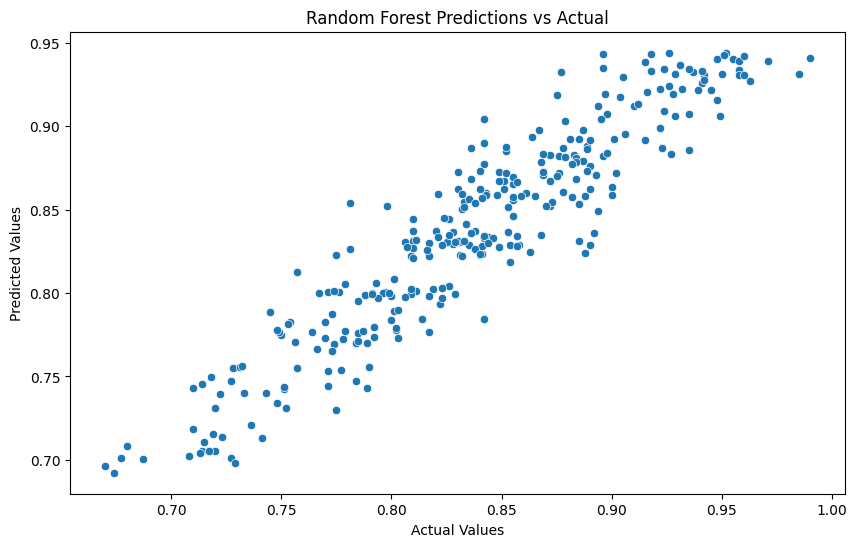

In [ ]:
# Scatter Plot for Random Forest Predictions
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_rf)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Random Forest Predictions vs Actual")
plt.show()


In [ ]:
# Save results
results = pd.DataFrame({
    "Actual": y_test,
    "Predicted_RF": y_pred_rf,
    "Predicted_LR": y_pred_lr
})
results.to_csv("model_results.csv", index=False)


from google.colab import files
files.download("model_results.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>